# Drawing a scene using Luxor.jl

This script draws a scene using the package [Luxor.jl](https://github.com/JuliaGraphics/Luxor.jl). I have drawn a snowy landscape that looks simple at first, but uses complex features of Luxor.jl to add attention to detail.

![](https://i.imgur.com/82ypriS.png)

**Disclaimer:** I have **_very_** bad choice of color, and this shows especially in the part where we render the house. Any help relating to fix that eyesore of a house is always welcome. I'm sorry you have to see this house for now XD.

## Background
To describe my image, I have used layers to add depth to the scene. In the background I have used a gradient color — or as Luxor calls it, a `blend` — for the sky, and have used circles for the moon and stars. Still in the background, but not quite the foreground, I have drawn coniferous trees by defining a function `generate_trees()` that takes in the following parameters listed in order:
- **`treex`**: Specifies the x-coordinate of the topmost part of the tree
- **`treey`**: Specifies the y-coordinate of the topmost part of the tree
- **`size`**: Specifies the size of the tree (arbitrary number, not pixels)
- **`hue`**: Color or `hue` of the tree
- **`snow`**: Specifies if the tree has snow on top (default = false)

Then, I used Perlin noise to generate a smooth randomness between the sizes of the trees. [This blogpost](https://cormullion.github.io/blog/2018/10/16/noise.html) by Cormullion really helped. I used the same Perlin Noise to generate a `Bezier Curve` for the topmost part of the snow-covered ground for the trees.
I covered the rest of the ground using a `rect` or `box`.

## Foreground
In the foreground, I again used Perlin Noise to generate the terrain on which the house lies, generated a `Bezier Curve`, and covered the rest of the ground using a `rect` or a `box`.

For the house, I again defined a function purely for aesthetical and readability purposes since there was too much code in one cell.

The function `generate_house()` takes in `x` and `y` signifying the x and y coordinates of the house respectively.

I used **lots** of polygons to make the house, and made another one above the previous one for a slightly darker edge stroke to each polygon.

For the house walls, I used a custom color since the colors in the palette were not looking all that great on the house. Since the house is done so poorly, I feel a pressing need to specify that the roof of the house is white due to the accumulation of snow over it.

For the windows and chimney, I used polygons (again), but for the window frames, I used lines. I used a **t h i c c** bezier curve for the smoke, and reduced its opacity. In my opinion, the smoke _could_ be made using a brush made up of beziers, but it seemed like to much work for very little benefit.

Again, I added some snow-covered trees in the foreground (which look _very_ "South Park" by the way), and added another layer of snow-covered land using a bezier curve made from a large triangle which is partially offscreen.

Finally, after ~9 hours of continuous testing, coding, looking through docs, drawing beziers, and punching numbers on my calculator, this drawing was done.

Comments are added througout the code explaining what each block of code does. I have not added markdown over every cell since most of the magic happens in one cell, while the others are just there for good organisation.

## References & Thanks
HUGE thanks to docs and package of course, it is amazing how much work has gone into them and how extensive both the docs and the package are.
Repo of Package: https://github.com/JuliaGraphics/Luxor.jl

Thanks to the [Blogpost](https://cormullion.github.io/blog/2018/10/16/noise.html) by [Cormullion](https://github.com/cormullion).

In [1073]:
using Luxor

In [1074]:
function generate_tree(treex, treey, size, hue, snow = false)
#     Set color and opacity
    setopacity(1)
    sethue(hue)
#     Decide number of triangles to draw for tree depending on size
    for i in 1:round(size/4, digits = 0)+ 3
#         Decide position of each triangle
        pointa = Point(treex, treey + (size+1)*i)
#         Draw triangle
        ngonside(pointa, size*i, 3, pi/6, :fill)
    end
#     If tree is snow-covered, then render the two top triangles as white.
#     This is placed after the loop since other triangles draw over the first 2 in the loop, and make it look weird.
    if (snow)
        setopacity(1)
        sethue("snow")
        ngonside(Point(treex, treey + (size+1)*1), size, 3, pi/6, :fill)
        ngonside(Point(treex, treey + (size+1)*2), size*2, 3, pi/6, :fill)
    end
end

generate_tree (generic function with 2 methods)

In [1075]:
function generate_house(x, y)
    
#     Setup
    setopacity(1)
    
#     Draw polygon on the left (left side of house, below the snowy roof)
    sethue(0.7451, 0.5882, 0.549)
    poly([Point(x-157, y+60), Point(x-86, y+50), Point(x-87, y+99), Point(x-157, y+103)], close = true, :fill)
    sethue(0.6588, 0.4745, 0.4431)
    poly([Point(x-157, y+60), Point(x-86, y+50), Point(x-87, y+99), Point(x-157, y+103)], close = true, :stroke)
    
#     Draw the front of the house (Pentagon shaped face)
    sethue(0.7451, 0.5882, 0.549)
    poly([Point(x-86, y+50), Point(x-87, y+99), Point(x+44, y+103), Point(x+42, y+53), Point(x-11, y-41)], close = true, :fill)
    sethue(0.6588, 0.4745, 0.4431)
    poly([Point(x-86, y+50), Point(x-87, y+99), Point(x+44, y+103), Point(x+42, y+53), Point(x-11, y-41)], close = true, :stroke)
    
#     Draw the snowy roof
    sethue("snow")
    poly([Point(x-157, y+60), Point(x-86, y+50), Point(x-11, y-41), Point(x-116, y+11)], close = true, :fill)
    sethue("snow2")
    poly([Point(x-157, y+60), Point(x-86, y+50), Point(x-11, y-41), Point(x-116, y+11)], close = true, :stroke)
    
#     Draw the chimney
    sethue(0.7451, 0.5882, 0.549)
    poly([Point(x-114, y+20), Point(x-90, y+20), Point(x-89, y-45), Point(x-106, y-40)], close = true, :fill)
    sethue(0.6588, 0.4745, 0.4431)
    poly([Point(x-114, y+20), Point(x-90, y+20), Point(x-89, y-45), Point(x-106, y-40)], close = true, :stroke)
    
#     Generate the bezier for the smoke and draw it
    sethue("whitesmoke")
    setline(20)
    setopacity(0.2)
    drawbezierpath(makebezierpath([Point(x-100, y-45), Point(x-80, y-50), Point(x-130, y-80), Point(x-30, y-132), Point(x-100, y-200)]), close = false, :stroke)
    
#     Reset to original stroke properties after drawing smoke
    setopacity(1)
    setline(1)
    
#     Draw Windows
#     Draw left most window
    sethue("gold")
    poly([Point(x-150, y+87), Point(x-130, y+85), Point(x-131, y+61), Point(x-150, y+64)], close = true, :fill)
    sethue("tan4")
    poly([Point(x-150, y+87), Point(x-130, y+85), Point(x-131, y+61), Point(x-150, y+64)], close = true, :stroke)
    line(Point(x-140, y+85), Point(x-141, y+63), :stroke)
    line(Point(x-130.5, y+73), Point(x-150, y+76), :stroke)
    
#     Draw the window to the immediate right of the leftmost window
    sethue("gold")
    poly([Point(x-117, y+82), Point(x-97, y+80), Point(x-97, y+56), Point(x-117, y+59)], close = true, :fill)
    sethue("tan4")
    poly([Point(x-117, y+82), Point(x-97, y+80), Point(x-97, y+56), Point(x-117, y+59)], close = true, :stroke)
    line(Point(x-107, y+80), Point(x-108, y+57), :stroke)
    line(Point(x-117, y+71), Point(x-97, y+69), :stroke)
    
#     Draw the window next to the door
    sethue("gold")
    poly([Point(x, y+90), Point(x+30, y+90), Point(x+30, y+55), Point(x, y+53)], close = true, :fill)
    sethue("tan4")
    poly([Point(x, y+90), Point(x+30, y+90), Point(x+30, y+55), Point(x, y+53)], close = true, :stroke)
    line(Point(x, y+72), Point(x+30, y+73), :stroke)
    line(Point(x+15, y+54), Point(x+15, y+90), :stroke)
    
#     Draw the circular window above the door
    sethue("gold")
    circle(x-15, y+10, 12, :fill)
    sethue("tan4")
    circle(x-15, y+10, 12, :stroke)
    line(Point(x-27, y+10), Point(x-3, y+10), :stroke)
    line(Point(x-15, y+22), Point(x-15, y-2), :stroke)
    
#     Draw the door    
    setopacity(0.3)
    sethue("tan3")
    poly([Point(x-61, y+100), Point(x-30, y+100.8),  Point(x-29, y+48), Point(x-60, y+48)], close = true, :fill)
    setopacity(0.4)
    sethue("tan4")
    poly([Point(x-61, y+100), Point(x-30, y+100.8),  Point(x-29, y+48), Point(x-60, y+48)], close = true, :stroke)
end

generate_house (generic function with 1 method)

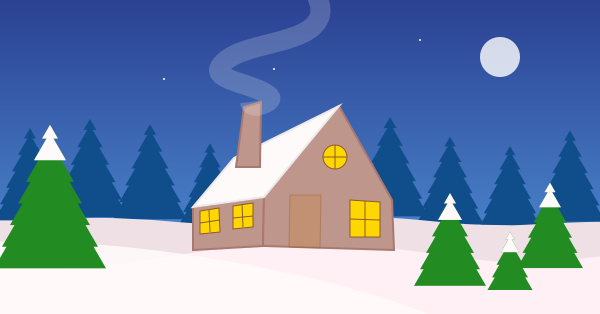

In [1076]:
# Setup drawing
Drawing(600, 314, "Scene.png")
# Set current point to origin
origin()

# Set up the sky
nightsky = blend(Point(0, -300), Point(0, 230), "midnightblue", "steelblue2")
setblend(nightsky)
box(O, 600, 314, :fill)

# Draw the stars
sethue("grey100")
circle(-136, -78, 1, :fill)
circle(-26, -88, 1, :fill)
circle(120, -117, 1, :fill)

# Draw moon
sethue("white")
setopacity(0.8)
circle(200, -100, 20, :fill)

# Generate size noise for trees
size = noise.(range(0, 5, length=10), detail = 10, persistence = 0)

# Generate new noise for ground on which house lies
yfore = noise.(range(4, 8, length=10), detail = 10, persistence = 0)

# Process ground noise to an array of points, and get array of lowest y-coordinate of noise (we draw the rect using this)
y_fore = .-(20, 70*yfore)
# Generate the Points, and put them in an array (WARNING: LOTS of Arbitrary constants)
gpointa = Point.(-370 .+ 70*collect(1:10), y_fore[collect(1:10)] .+ (yfore[collect(1:10)]*4 .+ 12)*8.2)
# Get array of y-coordinates of noise
abcd = map(x -> x.y , gpointa)

# Process tree size noise to an array of points, and get array of lowest y-coordinate of noise (we draw the ground using this)
y_pos = .-(-10, 50*size)
# Generate the Points, and put them in an array (WARNING: LOTS of arbitrary constants)
gpoint = Point.(-330 .+ 60*collect(1:10), y_pos[collect(1:10)] .+ (size[collect(1:10)]*4 .+ 10)*8.2)
# Get array of y-coordinates of noise
abc = map(x -> x.y , gpoint)

# Add drawing endpoints to make Bezier cover a large chunk of ground without needing the rect (Background terrain)
push!(gpoint, Point(400, gpoint[end].y), Point(301, 158), Point(-301, 158), Point(-350, gpoint[1].y))
# Add drawing endpoints to make Bezier cover a large chunk of ground without needing the rect (House terrain)
push!(gpointa, Point(400, gpointa[end].y), Point(301, 158), Point(-301, 158), Point(-350, gpointa[1].y))

# Draw trees starting from edge of the screen to the other edge, while using size and position noise.
for treenum in 1:10
    x = -330 + 60*treenum
    generate_tree(x, -10 - 50*size[treenum], size[treenum]*4 + 10, "dodgerblue4")
end

# Create rect to cover up rest of terrain that Bezier didn't cover by using 
# lowest point of bezier (minimum of noise y-coordinate), But using maximum since values are negative. (Background)
sethue("lavenderblush2")
box(Point(-301, maximum(abc)), Point(301, 158), :fill, vertices = false)
poly(polyfit(gpoint), :fill)

# Create rect to cover up rest of terrain that Bezier didn't cover by using 
# lowest point of bezier (minimum of noise y-coordinate), But using maximum since values are negative. (House Ground)
sethue("lavenderblush1")
setopacity(1)
box(Point(-301, maximum(abcd)), Point(301, 158), :fill, vertices = false)
poly(polyfit(gpointa), :fill)

# Draw the house with slightly adjusted coordinates
generate_house(50, -10)

# Draw snow-covered trees next to house without using noise
generate_tree(250, 20, 11, "forestgreen", true)
generate_tree(210, 70, 9, "forestgreen", true)
generate_tree(150, 30, 12, "forestgreen", true)

# Draw terrain closest to viewer using a large triangle partially offscreen
sethue("snow")
setopacity(0.9)
drawbezierpath(makebezierpath([Point(-400, 100), Point(200, 200), Point(-200, 350)]), :fill)

# Draw our final tree in foreground
generate_tree(-250, -40, 16, "forestgreen", true)


finish()
preview()